In [3]:
import os
import sys
import torch
import torch.nn as nn
import numpy as np
import segmentation_models_pytorch as smp
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

device = (torch.device("cuda") if torch.cuda.is_available()
          else torch.device("cpu"))

print(f"Training on device {device}.")

Training on device cpu.


In [4]:
effb1_UNet = smp.Unet(encoder_name='efficientnet-b1', encoder_depth=5, encoder_weights=None, decoder_use_batchnorm=True, decoder_channels=(256, 128, 64, 32, 16), decoder_attention_type=None, in_channels=3, classes=1, activation="softmax", aux_params=None)

In [68]:
print(sum(p.numel() for p in effb1_UNet.parameters() if p.requires_grad == True))

8757105


In [69]:
# Check out weights of stage3 - qubvel OpenCity Challenge winner UNet

weights = os.path.abspath("/home/chris/Dropbox/HOTOSM/code/model/qubvel_UNet/weights/stage3/effb1-f0/checkpoints/best.pth")
weights = torch.load(weights, map_location = device)
#print(weights)

In [70]:
effb1_UNet.load_state_dict(weights["state_dict"])

<All keys matched successfully>

In [71]:
effb1_UNet.eval()

Unet(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_

In [72]:
data_path = os.path.abspath("/home/chris/Dropbox/HOTOSM/SAMPLE/")

torch.Size([512, 512, 3])
torch.Size([3, 512, 512, 10])


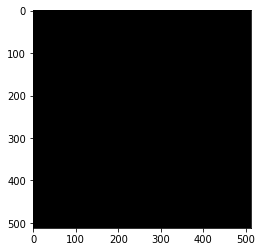

In [73]:
DZK = []

for root, path, filename in os.walk(os.path.join(data_path, "td_DZK", "IMG/")):
    for i in filename:
        if i.endswith(".png"):
            to_tensor = transforms.ToTensor()
            
            with Image.open(root + i) as img:
                img = to_tensor(img)
                DZK.append(img)

# plot the pixel values
#img_np = np.array(DZK[3])
#plt.hist(img_np.ravel(), bins=50, density=True)
#plt.xlabel("pixel values")
#plt.ylabel("relative frequency")
#plt.title("distribution of pixels")                

test = DZK[4].permute(1, 2, 0)
print(test.shape)
plt.imshow(test)

# Calculate mean and std for normalisation
# (Channel, Height, Width, Batch)
imgs = torch.stack(DZK, dim = 3)
print(imgs.shape)

mean = imgs.view(3, -1).mean(dim = 1)
std = imgs.view(3, -1).std(dim = 1)


In [1]:
# Reset DZK list
DZKN = []

for root, path, filename in os.walk(os.path.join(data_path, "td_DZKN", "IMG/")):
    for i in filename:
        if i.endswith(".png"):
            to_tensor = transforms.ToTensor()
            
            with Image.open(root + i) as img:
                img = to_tensor(img)
                DZKN.append(img)
                print(img.shape)

# plot the pixel values
img_np = np.array(DZKN[4])

plt.hist(img_np.flatten(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")
                
# (Batch, Channel, Height, Width) format == nn.Conv2d()                
imgs = torch.stack(DZKN, dim = 0)
print(imgs.shape)

NameError: name 'os' is not defined

In [2]:
# Pass the image through
img_t = DZK[4]
prediction = effb1_UNet(img_t.unsqueeze(0))

print(prediction)

predicted_class = prediction.detach().numpy()
print(np.argmax(predicted_class))

NameError: name 'DZK' is not defined